In [2]:
import tensorflow
from tensorflow.keras.models import Model, Sequential, load_model
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
import cv2
import os

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
siamese_net = load_model("../models/Conv8MaxPool3x3B4lr0.002siameselayer1epo_then_augmentedx4lr0.000000120epochs.h5")

NameError: name 'load_model' is not defined

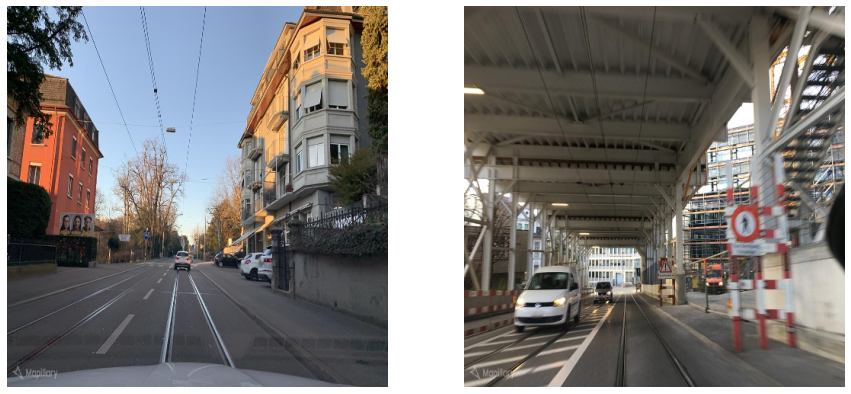

In [12]:
path = "../data/"

im1 = cv2.imread(path+"img5.jpg")
im2 = cv2.imread(path+"img24.jpg")

im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

im1t = cv2.resize(im1, (500, 500), interpolation=cv2.INTER_CUBIC)
im2t = cv2.resize(im2, (500, 500), interpolation=cv2.INTER_CUBIC)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,10))
ax1.imshow(im1t)
ax1.axis('off')
ax2.imshow(im2t)
ax2.axis('off')
plt.show()

im1 = cv2.resize(im1, (224, 224), interpolation=cv2.INTER_CUBIC)
im1 = preprocess_input(im1)

im2 = cv2.resize(im2, (224, 224), interpolation=cv2.INTER_CUBIC)
im2 = preprocess_input(im2)

In [13]:
res = siamese_net.predict([[im1], [im2]])[0]

if res[0] > res[1]:
  print("The scene in the SECOND image is perceived as safer, probability: "+str(int(res[0]*100))+"%")
else:
  print("The scene in the FIRST image is perceived as safer, probability: "+str(int(res[1]*100))+"%")

The scene in the FIRST image is perceived as safer, probability: 67%
